In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import torch
import torch.nn as nn
import tenseal as ts
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

# Yeast

In [2]:
genotype = pd.read_csv('./data/yeast/genotype_full.txt',sep='\t',index_col=0)
print("genotype shape:",genotype.shape)

genotype shape: (4390, 28220)


In [3]:
genotype[genotype == -1] = 0
genotype.head()

,33070_chrI_33070_A_T,33147_chrI_33147_G_T,33152_chrI_33152_T_C,33200_chrI_33200_C_T,33293_chrI_33293_A_T,33328_chrI_33328_C_A,33348_chrI_33348_G_C,33403_chrI_33403_C_T,33502_chrI_33502_A_G,33548_chrI_33548_A_C,...,12048853_chrXVI_925593_G_C,12049199_chrXVI_925939_T_C,12049441_chrXVI_926181_C_T,12050613_chrXVI_927353_T_G,12051167_chrXVI_927907_A_C,12051240_chrXVI_927980_A_G,12051367_chrXVI_928107_C_T,12052782_chrXVI_929522_C_T,12052988_chrXVI_929728_A_G,12053130_chrXVI_929870_C_T
SAMID,,,,,,,,,,,,,,,,,,,,,
01_01,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
01_02,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
01_03,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
01_04,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
01_06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
phenotype = pd.read_csv('./data/yeast/phenotype.csv', sep=',', index_col=0)
print("phenotype shape:",phenotype.shape)

phenotype shape: (4390, 20)


In [5]:
phenotype.head()

,1_CobaltChloride_1,1_CopperSulfate_1,1_Diamide_1,1_E6-Berbamine_1,1_Ethanol_1,1_Formamide_1,1_Hydroxyurea_1,1_IndolaceticAcid_1,1_Lactate_1,1_Lactose_1,1_MagnesiumChloride_1,1_ManganeseSulfate_1,1_Menadione_1,1_Neomycin_1,1_Raffinose_1,1_Trehalose_1,1_Xylose_1,1_YNB_1,1_YPD_1,1_Zeocin_1
01_01,-2.253831,-1.588146,0.194930,-1.055938,-0.250370,0.498227,-0.213244,-0.181865,NaN,-0.847586,-0.352481,1.212162,0.335224,-0.665269,-0.370470,-0.674826,-0.816972,17.711068,25.871208,0.763908
01_02,-1.887746,0.542872,0.451540,0.011593,0.103719,0.828660,0.639112,0.660820,NaN,-0.620460,0.394129,-1.942857,1.397952,-0.313936,1.007102,0.493351,-1.412415,18.286691,26.218803,1.272112
01_03,1.047185,0.453067,0.721835,1.645301,0.427616,-0.326177,-0.141772,-0.611875,-0.797737,-0.219193,-0.108411,0.750178,-0.913395,0.419907,-0.072188,-0.346773,0.169568,15.499536,24.496840,0.072323
01_04,2.417437,0.747427,0.454517,1.856809,-0.135731,0.556514,0.197233,0.371108,NaN,0.666068,0.021487,-0.917218,-0.239386,0.744319,0.033719,1.774186,0.668400,17.301076,25.827809,0.676447
01_06,-1.041743,0.180384,0.464474,-0.966225,-0.338030,-0.728221,0.543498,-1.833931,-0.170299,0.086030,0.108120,-1.251630,-0.038772,-0.670791,-0.233617,-0.199903,-0.283471,15.308695,25.513351,0.996027


In [6]:
X = genotype
Y = phenotype.iloc[:, 0]
X = X[~Y.isna()]
Y = Y[~Y.isna()]

In [7]:
x_train, x_test, y_train,y_test =  train_test_split(X, Y, test_size=0.1, random_state=0)
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
x_test = torch.tensor(x_test.values).float()
y_test = torch.tensor(y_test.values).float()

In [8]:
model=Lasso(alpha=0.00433031418540213,fit_intercept=True)
model.fit(x_train,y_train)

Lasso(alpha=0.00433031418540213)

In [9]:
non_zero_index = np.where(model.coef_!=0)[0]
print("number of non-zero parameters:",len(non_zero_index))

number of non-zero parameters: 325


In [10]:
zero_index = np.setdiff1d(np.arange(0,len(model.coef_)),non_zero_index)

In [11]:
PSR = 0.2
perturbation = zero_index[np.random.randint(0,len(zero_index),int(PSR*len(non_zero_index)))]

In [12]:
MIP_index = np.concatenate((non_zero_index,perturbation))
MIP_model = model.coef_[MIP_index]
MIP_data = x_test[:,MIP_index]

MIP against MIA

In [13]:
train_att_ind = np.random.randint(0,x_train.shape[0],x_test.shape[0])
x_train_att = x_train[train_att_ind,:]
x_test_att = x_test
print("x_train_att shape:", x_train_att.shape)
print("x_test_att shape:",x_test_att.shape)

x_train_att shape: torch.Size([417, 28220])
x_test_att shape: torch.Size([417, 28220])


In [14]:
def MIA_attack(model, att_coeff, PSR, non_zero_ind, zero_ind, num_bin ,x_train_att, x_test_att):
    model_att = copy.deepcopy(model)
    perturbation = zero_index[np.random.randint(0,len(zero_ind),int(PSR*len(non_zero_ind)))]
    MIP_ind = np.concatenate((non_zero_index,perturbation))
    model_att.coef_[perturbation]=att_coeff
    y_train_att=model_att.predict(x_train_att)
    y_test_att = model_att.predict(x_test_att)
    y_train_ = (y_train_att-y_train_att.min())/(y_train_att.max()-y_train_att.min())
    y_test_ = (y_test_att-y_test_att.min())/(y_test_att.max()-y_test_att.min())
    n1, _, _ = plt.hist(y_train_, bins=num_bin, alpha=0.7, label='train',density=True,range=[0,1])
    n2, _, _ = plt.hist(y_test_, bins=num_bin, alpha=0.7, label='test',density=True,range=[0,1])
    return 0.5*np.linalg.norm(n1-n2,1)/bins

[0.16067146 0.16067146 0.15827338 0.15827338 0.15827338 0.15347722
 0.15107914 0.16306954]


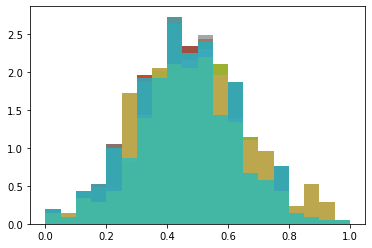

In [15]:
PSR_set = [0,0.2,0.5,1,2,5,10,20]
tvd_set=[]
bins=20
for i in range (20):
    tvd0=[]
    for psr in PSR_set:
        tvd = MIA_attack(model,model.coef_.mean(),psr,non_zero_index,zero_index,bins,x_train_att,x_test_att)
        tvd0.append(tvd)
    tvd_set.append(tvd0)
print(np.array(tvd_set).min(axis=0))

SHE

In [16]:
# Setup TenSEAL context
context = ts.context(
            ts.SCHEME_TYPE.CKKS,
            poly_modulus_degree=8192,
            coeff_mod_bit_sizes=[60,40, 40, 60]
          )
context.generate_galois_keys()
context.global_scale = 2**40

In [17]:
enc_model = []
time_start = time.time()
for para in MIP_model:
    enc_model.append(ts.ckks_vector(context,[para]))
time_end = time.time()
print("model encryption time:",time_end-time_start)

model encryption time: 2.052216053009033


In [18]:
enc_data = []
time_start = time.time()
num_sample = 10
for sample in MIP_data[:num_sample]:
    enc_sample =[]
    for feature in sample:
        enc_sample.append(ts.ckks_vector(context,[feature]))
    enc_data.append(enc_sample)
time_end = time.time()
print("data encryption time (per sample):",(time_end-time_start)/num_sample)

data encryption time (per sample): 2.561357021331787


In [19]:
enc_output = []
time_start = time.time()
for i in range(len(enc_data)):
    enc_sample = enc_data[i]
    out=0
    for j in range(len(enc_sample)):
        out += enc_model[j]*enc_sample[j]
    enc_output.append(out)
time_end = time.time() 
print("Prediction time (per sample):",(time_end-time_start)/num_sample)

Prediction time (per sample): 2.0643601179122926


In [20]:
dec_output = []
time_start = time.time()
for out in enc_output:
    dec_output.append(out.decrypt())
time_end=time.time()
print('decryption time:',time_end-time_start)

decryption time: 0.013390302658081055
